# <font color = 'brown' > Clustering

In this excerise, we are trying to cluster 500 [0,10] x [0,10] samples that are randomly assigned a values from a uniform distribution in range [0,10]x[0,10]. 

For this task, we are going to use three major clustering algorithms : Hierarchical, EM ,and DBSCAN.

A set of hyperparameters and optioned are pre-defined to make unique clustering algorithms for our task. 

<hr> 
    
Everything required for this exercise is available at : 
    
    
   
***GitHub***  : <a href = "" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "" > Homework-1 google drive </a>

# <font color = 'brown' > Import Libraries

<hr>


These libraries are essential to our code so please make sure that all of them are installed or 
<code> pip install </code> them.

- numpy, random ,and pandas are used for primal data operation


- matplotlib and seaborn are used for data visualization


- sklearn is the base of clustering algorithms



In [23]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

## <font color ='brown'> Hyperparameter/Options Assignment

In this section we assign hyperparameters and options for different algorithms. 

- n is the number of samples that we are going to generate


- n_clusters is the number of clusters we are willing to achieve


- affinity and linkage are both Hierarchical algorithm options

    - affinity can be 'l1' , 'l2' , 'euclidean' , 'manhattan' , 'cosine' ,or 'precomputed'
    
    - linkage  can be 'ward', 'complete' , 'single' ,or 'average'
    
- eps and min_samples are both dbscan hyperparameters.
    
    
- colors are a list of randomly generated colors for each clusters
    
    - c function, make use of colors to assign a color to each label in the clustering label list.
        if in dbscan, a label is -1, then the color is 'red'
    
    
**Since colors are randomly generated, sometimes it can generate very similar colors which might make it hard to distinguish the clusters; Therefore, re-run this section again to generate new colors**

In [29]:
# Number of Samples 
n = 500

# Number of Clusters
n_clusters = 2

# Hierarchical metric(affinity) and linkage

affinity = 'l1'
linkage  = 'complete' 


# DBSCAN eps and min point
eps = 0.5
min_samples = 8

# Colors

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(n)]
def c(labels):
    _c = []
    for label in labels:
        if label != -1:
            _c.append(colors[label])
        else:
            _c.append('red')
    return _c

# <font color  = 'brown'> Generate Data

<hr>

Generating n random 2D numbers. 

Optional : create a dataframe based on these numbers

In [25]:
data = np.random.uniform(low=[0,0], high=[10,10], size = (n, 2))

# [ Optinal ] --> Convert data to a Pandas DataFrame
dataframe = pd.DataFrame(data, columns=['x','y'])

# <font color = 'brown' > Visualize Data

<hr>
    
Visualizing the generated numbers using matplotlib and seaborn(for histogram)

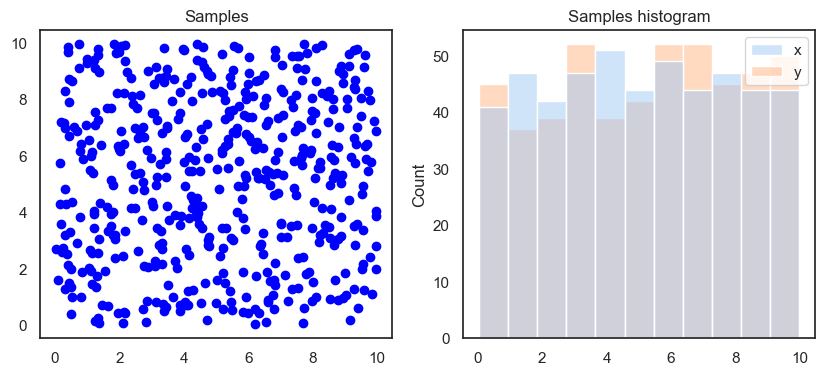

In [26]:
sns.set_theme(style='white', palette='pastel')

fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].scatter(dataframe['x'],dataframe['y'], color = 'blue' ,marker = 'o', label = 'Samples')
ax[0].set_title('Samples')


sns.histplot(dataframe, ax = ax[1])
ax[1].set_title('Samples histogram')

plt.show()

# <font color = 'brown' >  Hierarchical Clustering (Complete Link - L1)

<hr>


Using sklearn AgglomerativeClustering algorithm, we can perform hierarchical clustering on our dataset. We are using 'l1' hierarchical clustering with 'complete' linkage method.

In [27]:
# Create the model

clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)

# Fit the model on dataset

clustering.fit(dataframe)

# Clustering labels

Hierarchical_labels = clustering.labels_


## <font color = 'brown' >  Visualizing the Results and lables

The result of hierarchical clustering can be acquired  using <code>.labels_</code> or other methods.

These labels are then assigned a color and visualized in a scatter plot using matplotlib.

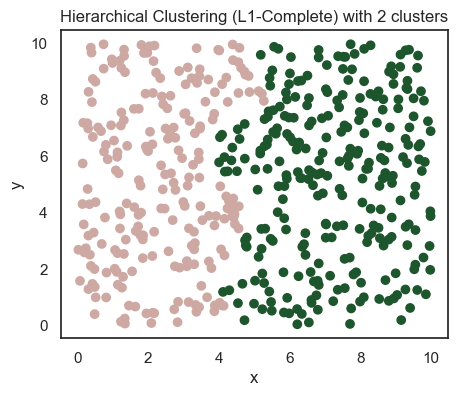

In [30]:
# Clustering Result

fig = plt.figure(figsize=(5, 4))

plt.scatter(dataframe['x'], dataframe['y'], marker = 'o' ,c = c(Hierarchical_labels))
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hierarchical Clustering (L1-Complete) with {n_clusters} clusters')

plt.show()

# <font color = 'brown' >  Expected Maximum Clustering

<hr>

Using sklearn GaussianMixture algorithm, we can perform EM clustering on our dataset. 

In [35]:
# Create the model

clustering = GaussianMixture(n_components= n_clusters)

# Fit the model on dataset

clustering.fit(dataframe)

# Clustering labels

EM_labels = clustering.predict(dataframe)


## <font color = 'brown' >  Visualizing the Results and lables

We can acquire clustering labels using <code>.predict()</code> method of GMM. The result is later colored and displayed using scatter plot from matplotlib.

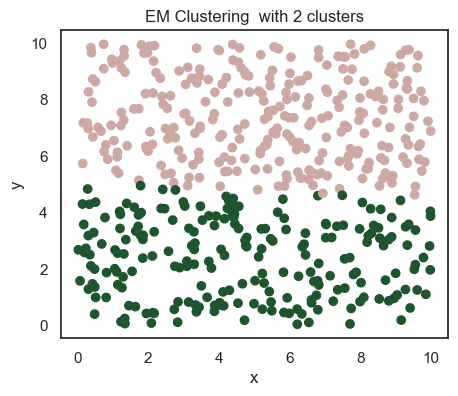

In [36]:
# Clustering Result

fig = plt.figure(figsize=(5, 4))

plt.scatter(dataframe['x'], dataframe['y'], marker = 'o' ,c = c(EM_labels))
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'EM Clustering  with {n_clusters} clusters')

plt.show()

# <font color = 'brown' > DBSSCAN Clustering

<hr>

Using sklearn DBSCAN algorithm, we can perform dbscan clustering on our dataset. Hyperparameters are set at the beginning of this exercise and different values in hyperparameters can result in different clusters.  

In [37]:
# Create the model

clustering = DBSCAN(eps=eps, min_samples= min_samples)

# Fit the model on dataset

clustering.fit(dataframe)

# Clustering labels

DBSCAN_labels = clustering.labels_

## <font color = 'brown' > Visualizing the Results and lables

Just like hierarchical clustering, clusters can be acquired using <code>.labels_</code> and then colored using the c function. 

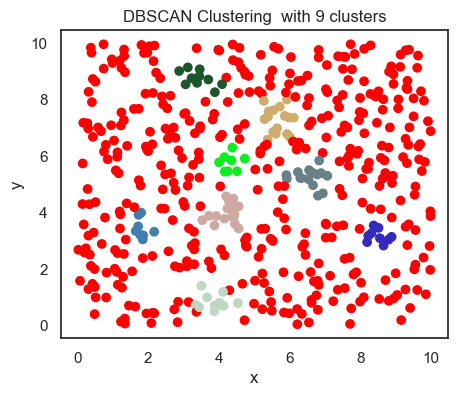

In [41]:
# Clustering Result
# Red samples are noisy the data

fig = plt.figure(figsize=(5, 4))

plt.scatter(dataframe['x'], dataframe['y'], marker = 'o' ,c = c(DBSCAN_labels))
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'DBSCAN Clustering  with {len(np.unique(DBSCAN_labels))} clusters')

plt.show()